# **Induced Pairing**

In [1]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

from MTI_Second_Order import FMTI2_NeumannBC

# labels for curves
Flabels = [["$f_{\\uparrow +, \\uparrow +}$", "$f_{\\uparrow +, \downarrow +}$", "$f_{\\uparrow +, \\uparrow -}$", "$f_{\\uparrow +, \downarrow -}$"],
          ["$f_{\downarrow +, \\uparrow +}$", "$f_{\downarrow +, \downarrow +}$", "$f_{\downarrow +, \\uparrow -}$", "$f_{\downarrow +, \downarrow -}$"],
          ["$f_{\\uparrow -, \\uparrow +}$", "$f_{\\uparrow -, \downarrow +}$", "$f_{\\uparrow -, \\uparrow -}$", "$f_{\\uparrow -, \downarrow -}$"],
          ["$f_{\downarrow -, \\uparrow +}$", "$f_{\downarrow -, \downarrow +}$", "$f_{\downarrow -, \\uparrow -}$", "$f_{\downarrow -, \downarrow -}$"]]

# colors for plotting
colors_real = ['brown', 'red', 'orange', 'gold']
# colors for plotting
colors_imag = ['blue','dodgerblue','lightskyblue','cyan']
# colors for plotting
colors_abs = ["#0077FF", "#00CC00", "#FFD700", "#FF2200"]


# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.0025
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

F2 = np.array([FMTI2_NeumannBC(d=d, z=z, Z=z, z0=0, kx=0.001, ky=0.002, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in lattice])
print(F2.shape)

(250, 4, 4)


### Check on Antisymmetry

In order to satisy the Pauli principle, the anomalous Green's fucntion must satisfy the following antisymmetry relation:
$$
    \mathcal{F}^{\dagger}_{\alpha\beta}(k_x,k_y; z,z';\omega) = - \mathcal{F}^{\dagger}_{\beta\alpha}(-k_x,-k_y; z',z;-\omega) \,.
$$

In [2]:
z1 = 8; z2 = 79; kx = -0.04; ky = 0.018; w = 0.03

f = FMTI2_NeumannBC(d=d, z=z1, Z=z2, z0=0., kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=w, Gamma=Gamma)
print(f)
print()

finv = FMTI2_NeumannBC(d=d, z=z2, Z=z1, z0=0., kx=-kx, ky=-ky, L=L, mu=mu, Delta=Delta, omega=-w, Gamma=Gamma)
print(-finv)
print()
print()

div = np.divide( f, np.transpose(finv) )
add = np.add( f, np.transpose(finv) ); add[np.abs(add) < 1E-6] = 0


print(add)
print()
print(div.real)

[[ 6.90887718e-06+2.00287970e-06j  5.78109613e-06-2.50996792e-06j
  -2.66393901e-06-4.66150439e-06j -2.81639648e-06+4.76681808e-06j]
 [-2.67215596e-07+7.42279906e-06j  3.87990198e-06+4.59087777e-06j
   3.93219716e-06-3.79334007e-06j -5.04706846e-06-1.23048822e-06j]
 [-7.35039207e-06+2.03223015e-06j -4.63113957e-06+4.50096436e-06j
   4.92467989e-06+2.89169765e-06j  1.16092877e-06-5.61715861e-06j]
 [ 3.49990121e-06-7.26033820e-06j -7.16897049e-07-5.76838279e-06j
  -5.57266235e-06+1.88217047e-06j  3.26852386e-06+3.77362664e-06j]]

[[ 6.90887718e-06+2.00287970e-06j -2.67215596e-07+7.42279906e-06j
  -7.35039207e-06+2.03223015e-06j  3.49990121e-06-7.26033820e-06j]
 [ 5.78109613e-06-2.50996792e-06j  3.87990198e-06+4.59087777e-06j
  -4.63113957e-06+4.50096436e-06j -7.16897049e-07-5.76838279e-06j]
 [-2.66393901e-06-4.66150439e-06j  3.93219716e-06-3.79334007e-06j
   4.92467989e-06+2.89169765e-06j -5.57266235e-06+1.88217047e-06j]
 [-2.81639648e-06+4.76681808e-06j -5.04706846e-06-1.23048822e-06j
 

## Spatial Dependence

#### <font color='green'> **Absolute Value** </font> 

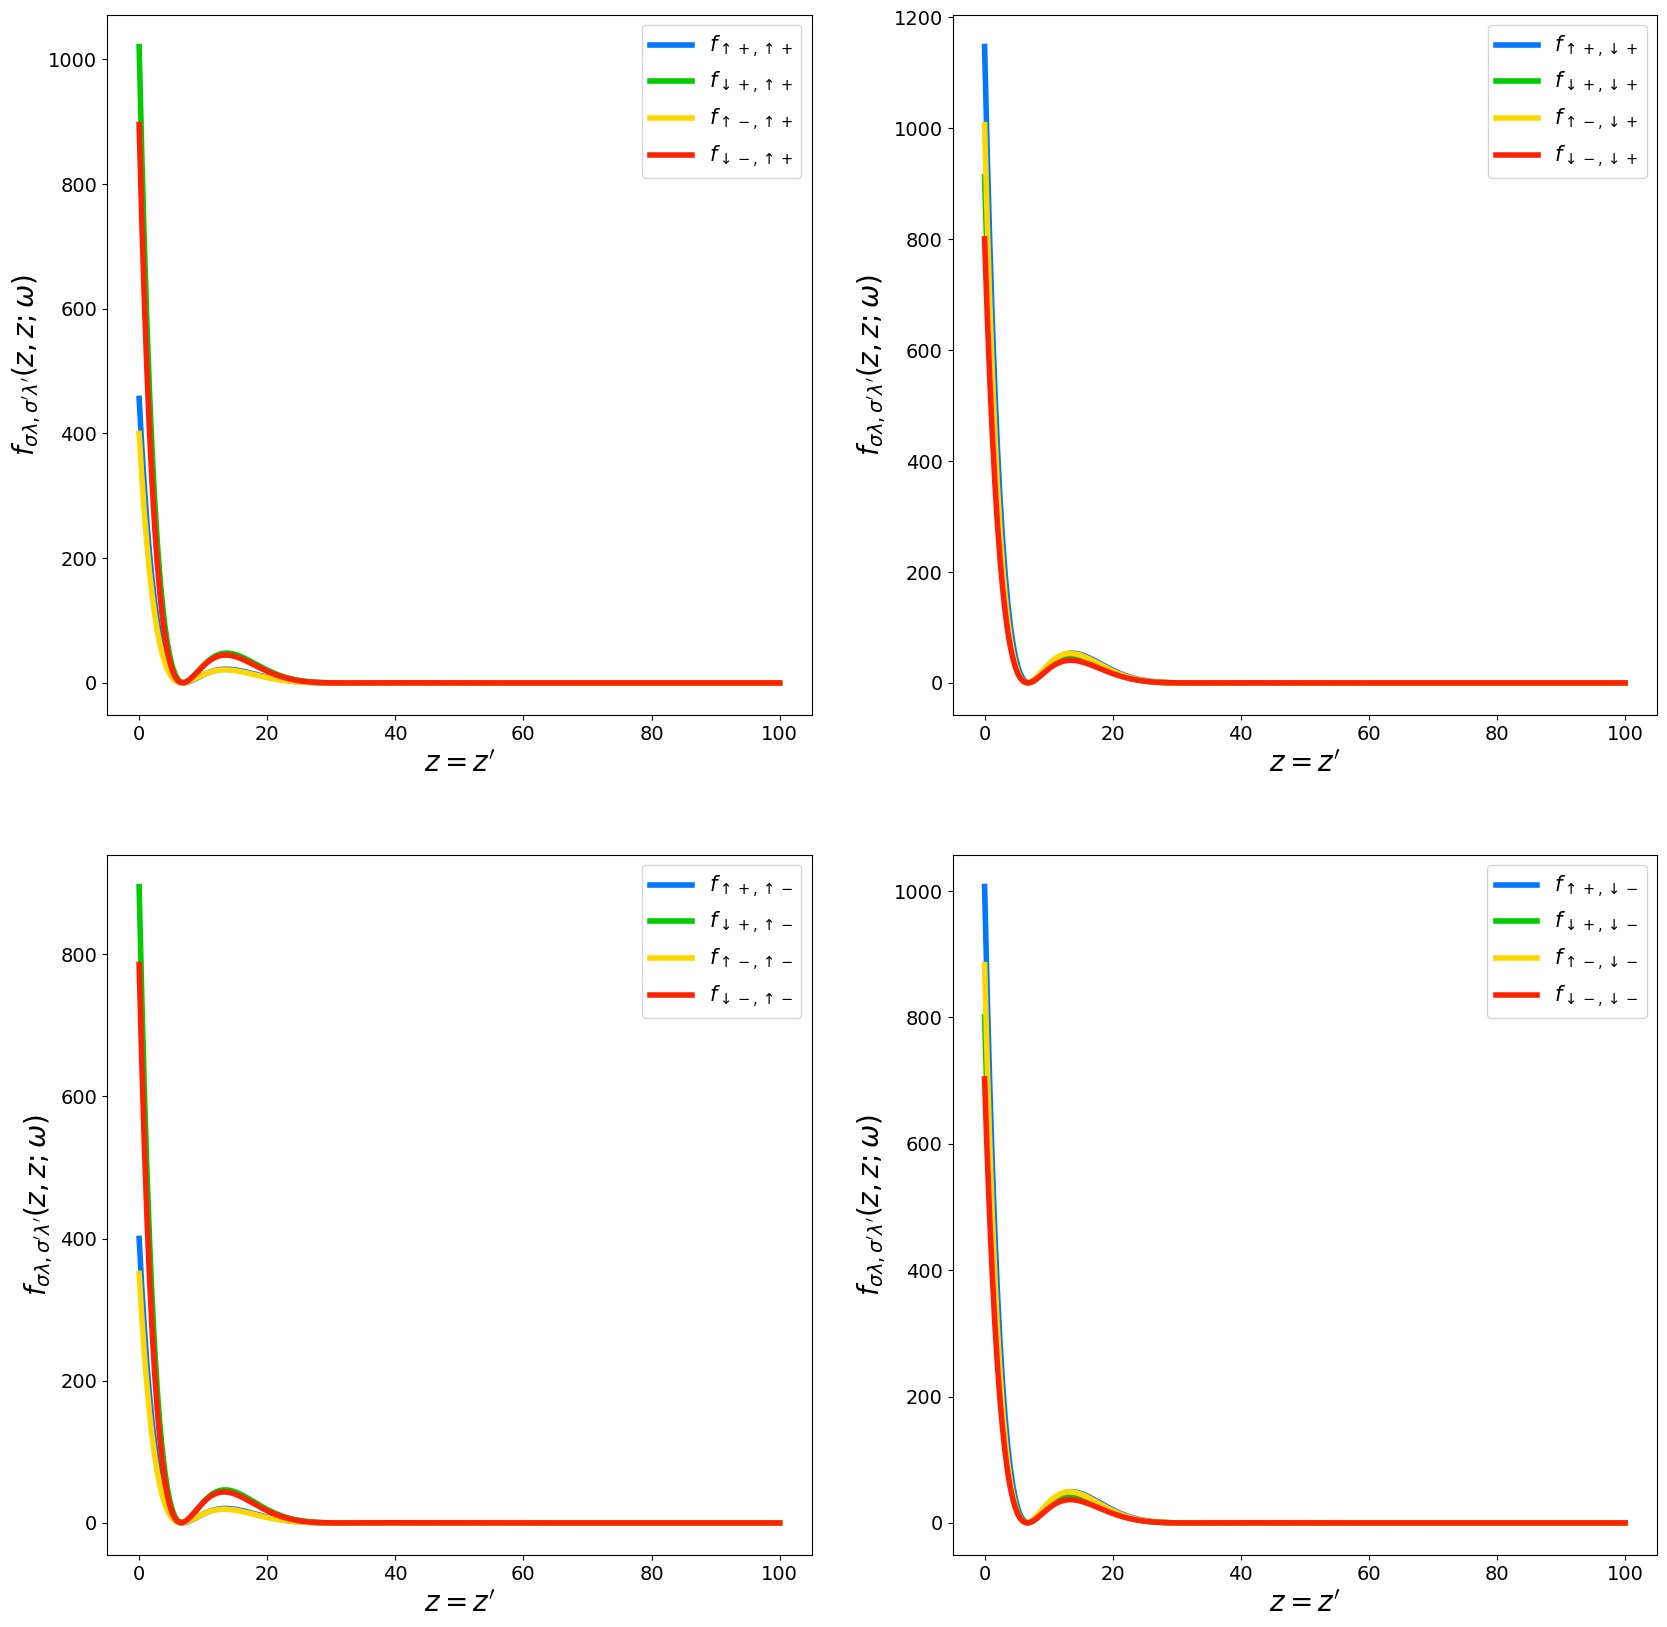

In [3]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(lattice, abs(F2[:,irow,icol]), c=colors[irow], lw=4, label=Flabels[irow][icol] )

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15)

## Frequency Dependence

In [4]:
# parameters
d = 100.; mu = 0.010; Delta = 0.005; L = 0.050; omega = 0.0025; z0=0
# frequency
frequency = np.linspace(-Delta, Delta, 150)
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

F2 = np.array([FMTI2_NeumannBC(d=d, z=5., Z=5., z0=0., kx=0.005, ky=-0.005, L=L, mu=mu, Delta=Delta, omega=f, Gamma=Gamma) for f in frequency])
print(F2.shape)

/home/ifisc/Desktop/Thomas/Proximity Effect/Greens-Function/SC_Gorkov_Equation.py:48: RuntimeWarning: divide by zero encountered in cdouble_scalars
  return -hbar*np.conj(Delta)/(4*t*w0) * ( 1./kp*np.exp(1j*kp*np.abs(z-Z)) - 1./km*np.exp(1j*km*np.abs(z-Z)) )
/home/ifisc/Desktop/Thomas/Proximity Effect/Greens-Function/SC_Gorkov_Equation.py:48: RuntimeWarning: invalid value encountered in cdouble_scalars
  return -hbar*np.conj(Delta)/(4*t*w0) * ( 1./kp*np.exp(1j*kp*np.abs(z-Z)) - 1./km*np.exp(1j*km*np.abs(z-Z)) )


(150, 4, 4)


#### <font color='green'> **Absolute Value** </font> 

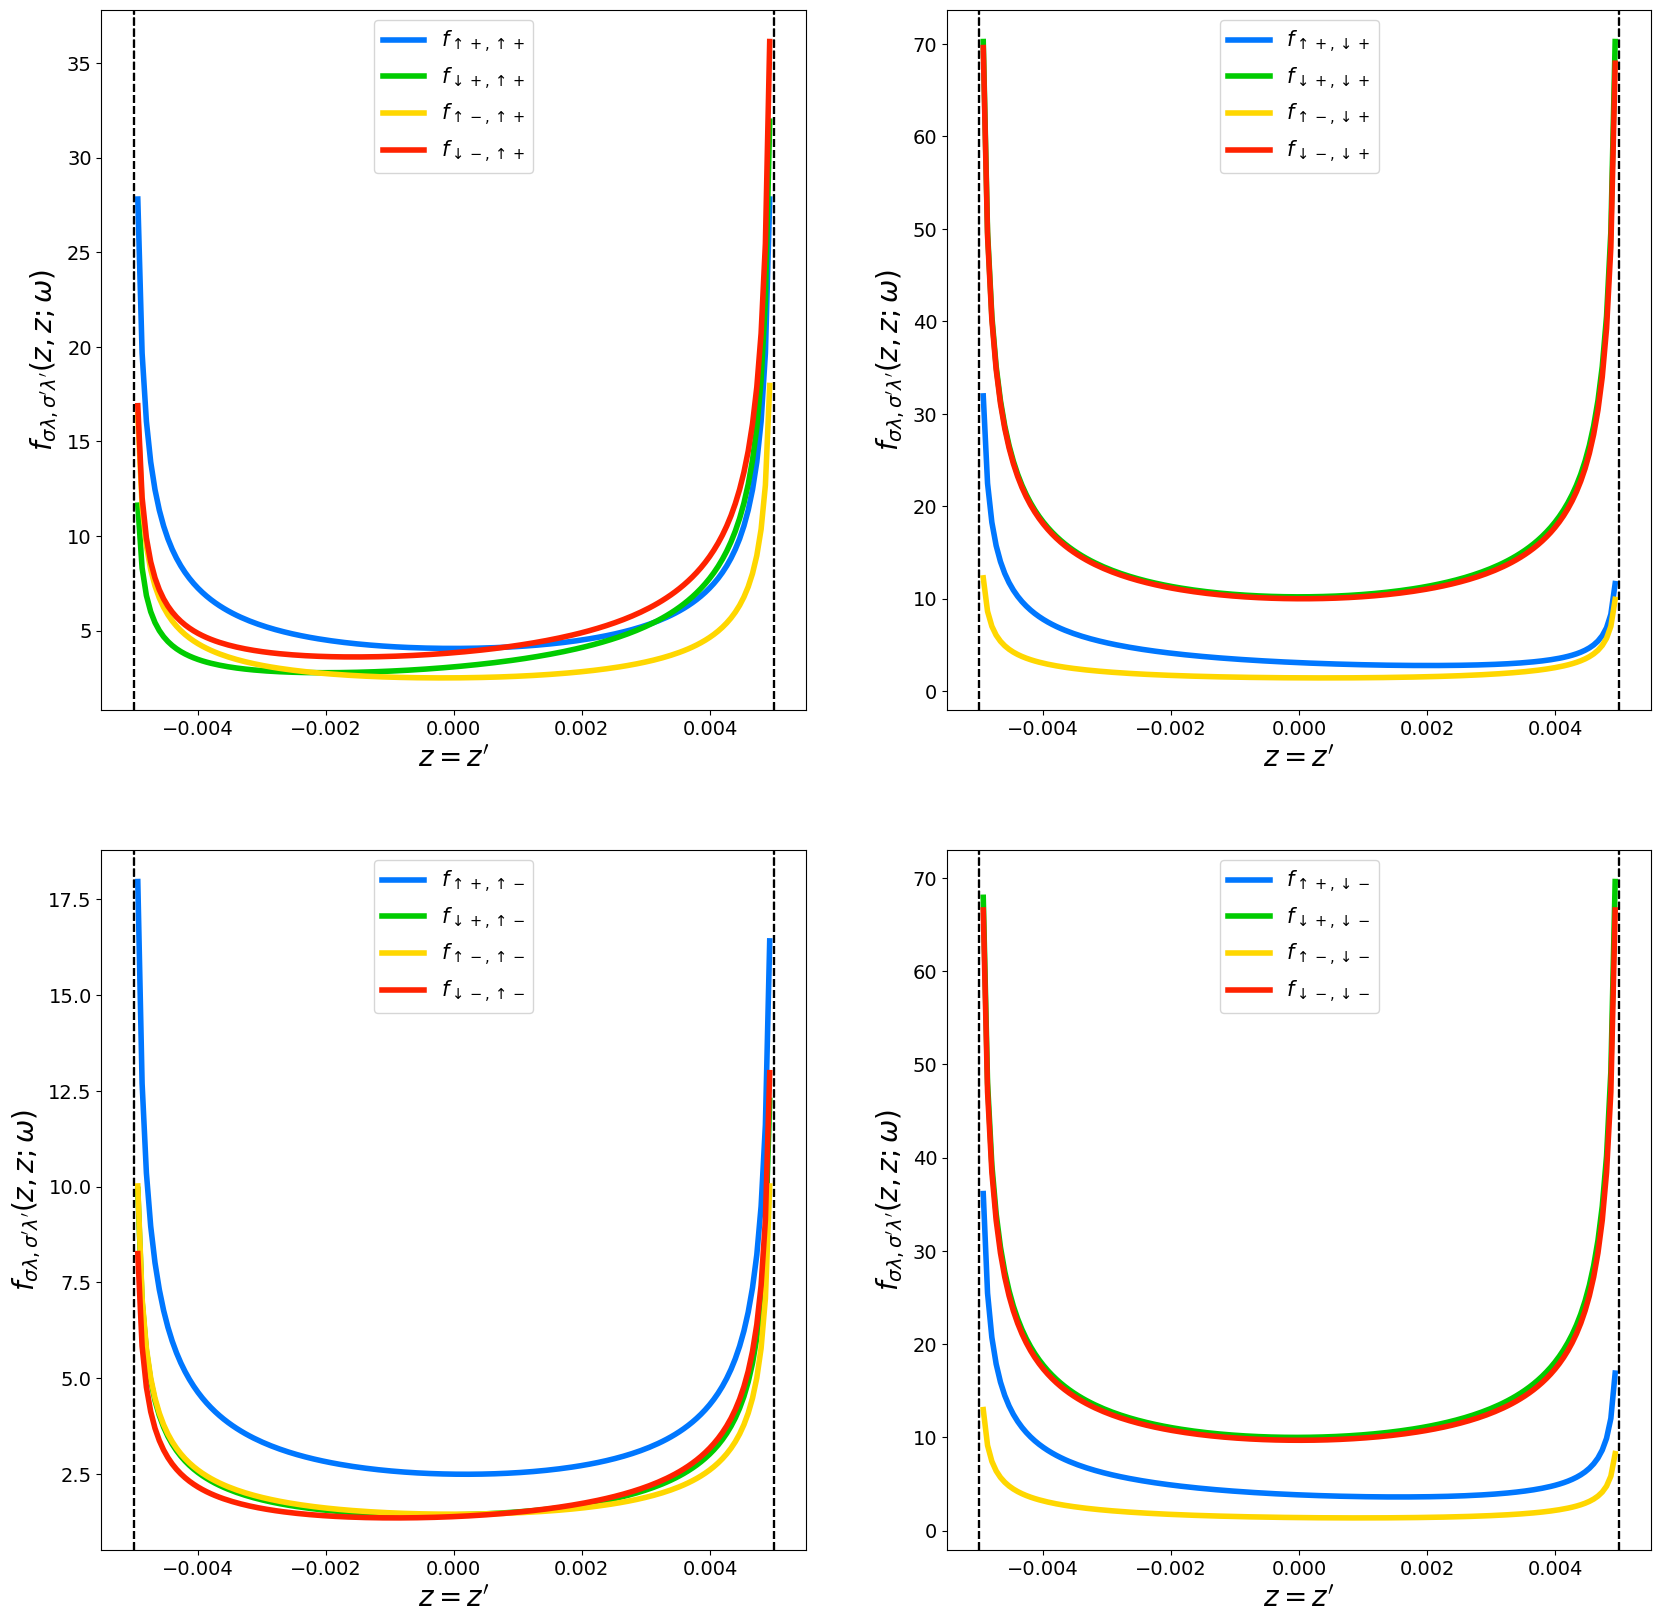

In [5]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        axs[iPic][jPic].axvline(x=Delta, c='black', lw=1.5, ls='--'); axs[iPic][jPic].axvline(x=-Delta, c='black', lw=1.5, ls='--')

        # plot second order correction F2
        axs[iPic][jPic].plot(frequency, abs(F2[:,irow,icol]), c=colors[irow], lw=4, label=Flabels[irow][icol] )
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

## <font color='black'> Wigner Transform </font> 

We switch to relative coordinates 
$$
    Z = \frac12 (z+z') \,, 
    \qquad
    \overline{z} = z-z' \,,
$$
in order to obtain the pairing as a function of center-of-mass $Z$ and relative position $\overline{z}$ of the two electrons forming a Cooper pair.
The opposite transformation from relative coordinates to separate coordinates $z$ and $z'$ is given by
$$
    z = Z+\frac12 \overline{z} \,, 
    \qquad
    z' = Z-\frac12 \overline{z} \,.
$$
Fixed the center of mass coordinate $Z$ of the Cooper pair, we can perform a *discrete Fourier transform* over the relative coordinate as
$$
    \mathcal{F}_{\alpha \beta}^{\dagger}(Z, k) = \sum_{\overline{z}} e^{-i k \overline{z}} 
    \mathcal{F}_{\alpha \beta}^{\dagger}(Z+\frac12 \overline{z}, Z-\frac12 \overline{z}) \,.
$$

### **Relative Coordinates**

In [6]:
# Evaluate discrete Fourier transform in relative coordinates
# kz=local momentum along z, Z0=center of mass of Cooper pair
def DiscreteFT(d, Z0, kx, ky, L, mu, Delta, omega, Gamma, z0=0, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar=1., t=1.):
    
    # discrete lattice for relative coordinates
    zrelative = np.linspace(-10,10,200)
    # lattice spacing for relative coordinates
    a = abs( zrelative[1]-zrelative[2] ); N = len(zrelative)

    # F2 in relative coordinates
    F2_rc = []; 
    # loop over relative coordinate z
    for z in zrelative:
    
        # separate coordinates z1, z2
        z1 = Z0 + 1/2*z; z2 = Z0 - 1/2*z
    
        # evaluate F2 as function of relative position z for fixed center of mass Z
        F2_rc.append( FMTI2_NeumannBC(d=d, z=z1, Z=z2, z0=z0, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar) )
    
    # array for F2 in relative coordinates
    F2_rc = np.array(F2_rc)
    
    # shift origin in z=0
    F2_rc = np.fft.fftshift(F2_rc)
    # evaluate discrete Fourier transform
    F2_k = np.fft.fft(F2_rc)
    # shift origin in k=0
    F2_k = np.fft.fftshift(F2_k)
    
    # corresponding k values
    k = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(N, d=a))
    
    return k, F2_k


# center of mass
Z0 = 1
# lattice for relative distances
zrelative = np.linspace(-10,10,200)
# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
kx = 0.00; ky = 0.00; mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.; z0=0
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# compute discrete FT
k, F2_k = DiscreteFT(d=d, Z0=Z0, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma)
print(k.shape, F2_k.shape)

(200,) (200, 4, 4)


#### <font color='green'> **Wigner Transform** </font> 

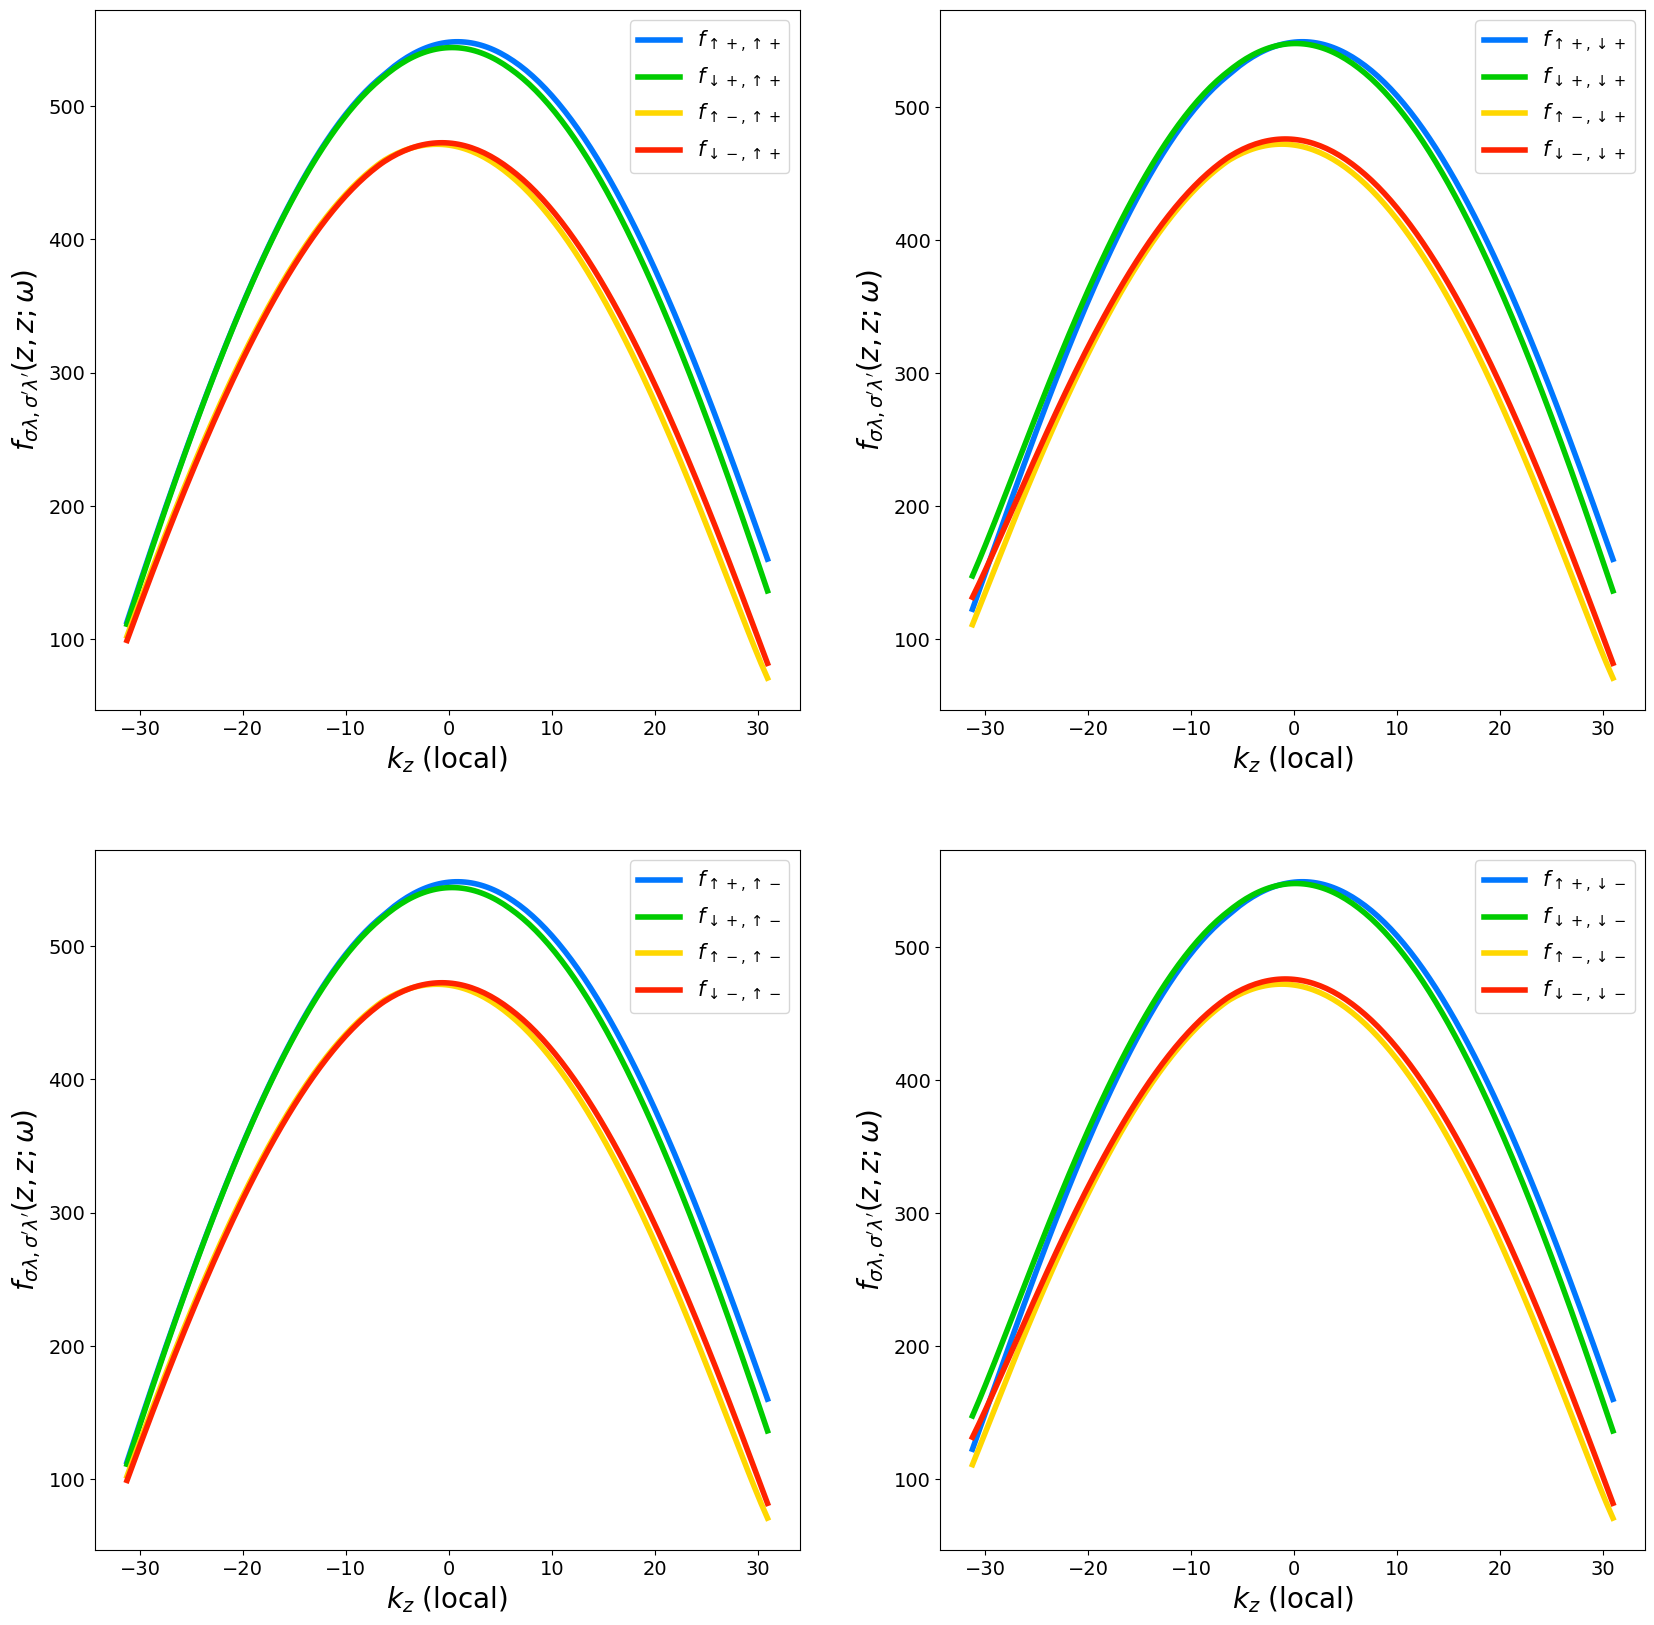

In [7]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(k, abs(F2_k[:,irow,icol]), c=colors[irow], lw=4, label=Flabels[irow][icol] )
    
    axs[iPic][jPic].set_xlabel("$k_z$ (local)", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### **Pairing Symmetry**

To study the symmetry of the pairing, we just need to understand how it behaves under inversion of the momentum, i.e. when transforming $(k_x,k_y, k_z) \rightarrow (-k_x,-k_y, -k_z)$.
In a central potential, the angular part of a wavefunction is described by spherical harmonics
$$
    \psi(\mathbf{r}) = R_l(r) Y_l^m(\theta, \phi) \,.
$$
Each $l$ corresponds to a specific spatial symmetry:
 
- $l=0 \;$  $s$-wave, even and fully isotropic;
- $l=1 \;$  $p$-wave, odd with a dipole-like structure;
- $l=0 \;$  $d$-wave, even with quadrupole-like lobes.


Inversion (also known as parity) transforms real space position as $\mathbf{r} \rightarrow -\mathbf{r}$ and momentum as $\mathbf{k} \rightarrow -\mathbf{k}$.
Spherical harmonics satisfy
$$
    Y_l^m(- \hat{r}) = (-1)^l Y_l^m(\hat{r}) \,,
$$
meaning that the eigenstates of angular momentum are also eigenstates of parity with parity $(-1)^l$. 
This means that if $\psi(\mathbf{r})$ is made from even angular momenta $l$ is even under inversion $\psi(\mathbf{r})=\psi(\mathbf{-r})$, while is odd if it is made from odd angular momenta $\psi(\mathbf{r})=-\psi(\mathbf{-r})$.
The wavefunction remains even or odd even in momentum space, meaning that the parity of the real-space waveunction can be deduced from the behaviour under inversion transformation $\mathbf{k} \rightarrow -\mathbf{k}$.

- If $\psi(\mathbf{r})$ has even orbital angular momentum $l=0,2,\dots$:
  $$
      \psi(\mathbf{r})=\psi(\mathbf{-r}) \,,
      \qquad
      \psi(\mathbf{k})=\psi(\mathbf{-k}) \,;
  $$
- If $\psi(\mathbf{r})$ has odd orbital angular momentum $l=1,3,\dots$:
  $$
      \psi(\mathbf{r})=-\psi(\mathbf{-r}) \,,
      \qquad
      \psi(\mathbf{k})=-\psi(\mathbf{-k}) \,.
  $$

#### <font color='green'> **Parity Analysis** </font> 

In [10]:
# center of mass
Z0 = 1
# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
kx = 0.012; ky = 0.0053; mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.; z0=0
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])


# compute Wigner transform for kx,ky
k, F = DiscreteFT(d=d, Z0=Z0, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma)

# compute Wigner transform for -kx,-ky
k, F_inv = DiscreteFT(d=d, Z0=Z0, kx=-kx, ky=-ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma)
F_inv = F_inv[::-1, :, :] 

# define even part with momentum reversal 
F_even = 0.5 * (F + F_inv)
# define odd part with momentum reversal 
F_odd  = 0.5 * (F - F_inv)

# get even part as ratio over total for each component
even = np.divide(F_even, F)
# get odd part as ratio over total for each component
odd = np.divide(F_odd, F)

print(even.shape, odd.shape)

print(even[0], odd[0])

'''

Fk = np.linalg.norm(F, axis=(1, 2))
even_k = np.linalg.norm(F_even, axis=(1, 2))
odd_k = np.linalg.norm(F_odd, axis=(1, 2))

for idx in range(len(Fk)):
    
    even_fraction = np.linalg.norm(even_k) / np.linalg.norm(Fk)
    odd_fraction  = np.linalg.norm(odd_k) / np.linalg.norm(Fk)

    print(even_fraction, odd_fraction)
'''

(200, 4, 4) (200, 4, 4)
[[ 0.64677031-0.07703618j  0.62472657+0.18680667j  1.18978107+0.72886806j
   1.46200423-0.67464744j]
 [ 0.50287909+0.12327521j  0.45732   -0.26002499j -0.27783357-1.50893101j
   0.08424329+1.19186642j]
 [ 0.65358842-0.13201191j  0.58957086+0.40768505j  1.62358923+1.52308776j
   2.15838682-1.27325108j]
 [ 0.45534668+0.16621248j  0.3467528 -0.37773126j -0.85294602-2.1025193j
  -0.06125276+1.68569734j]] [[ 0.35322969+0.07703618j  0.37527343-0.18680667j -0.18978107-0.72886806j
  -0.46200423+0.67464744j]
 [ 0.49712091-0.12327521j  0.54268   +0.26002499j  1.27783357+1.50893101j
   0.91575671-1.19186642j]
 [ 0.34641158+0.13201191j  0.41042914-0.40768505j -0.62358923-1.52308776j
  -1.15838682+1.27325108j]
 [ 0.54465332-0.16621248j  0.6532472 +0.37773126j  1.85294602+2.1025193j
   1.06125276-1.68569734j]]


'\n\nFk = np.linalg.norm(F, axis=(1, 2))\neven_k = np.linalg.norm(F_even, axis=(1, 2))\nodd_k = np.linalg.norm(F_odd, axis=(1, 2))\n\nfor idx in range(len(Fk)):\n    \n    even_fraction = np.linalg.norm(even_k) / np.linalg.norm(Fk)\n    odd_fraction  = np.linalg.norm(odd_k) / np.linalg.norm(Fk)\n\n    print(even_fraction, odd_fraction)\n'